<a href="https://colab.research.google.com/github/leonardodasomci/-/blob/main/%EB%A7%A4%EB%8F%84_%ED%83%80%EC%9D%B4%EB%B0%8D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/tmp/ipython-input-1166224669.py:32: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data['Signal'][20:] = np.where(data['SMA20'][20:] > data['SMA50'][20:], 1, -1)
/tmp/ipython-input-1166224669.py:32: SettingWithCopyWarning: 
A value is trying

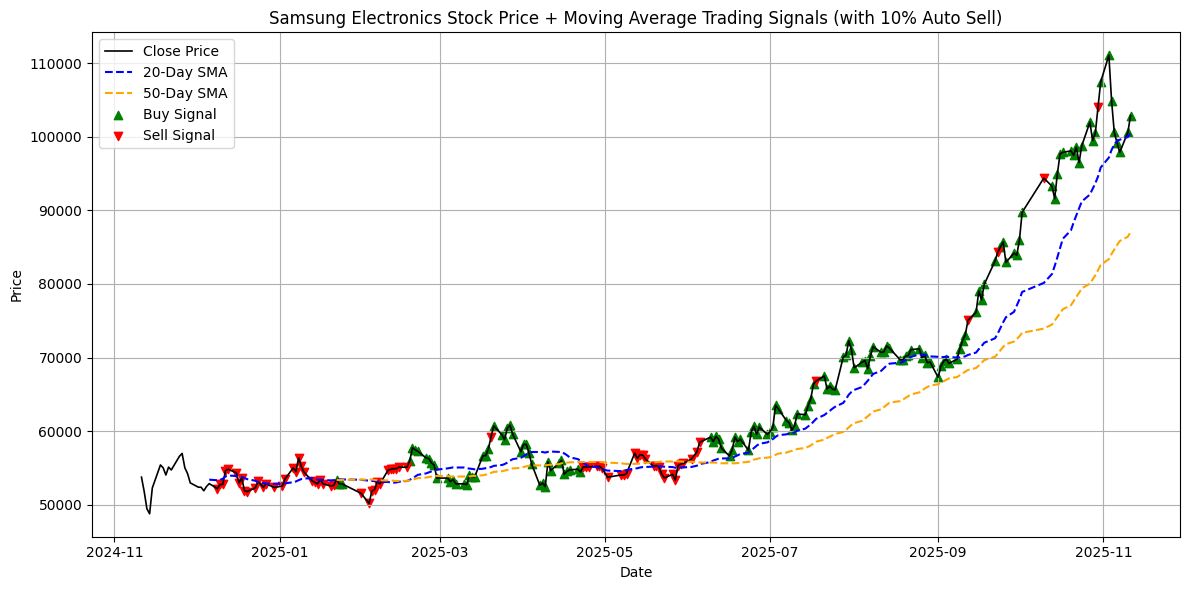

In [7]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm
import platform

# ✅ [1] 폰트 설정 (운영체제별 자동 적용) - Not needed if using English
# system_name = platform.system()
# if system_name == 'Darwin':  # macOS
#     font_name = 'AppleGothic'
# elif system_name == 'Windows':
#     font_name = 'Malgun Gothic'
# else:  # Linux (예: Colab)
#     font_list = [f.name for f in fm.fontManager.ttflist if 'NanumGothic' in f.name]
#     font_name = font_list[0] if font_list else 'DejaVu Sans'

# mpl.rc('font', family=font_name)
mpl.rcParams['axes.unicode_minus'] = False  # 마이너스 깨짐 방지

# ✅ [2] 데이터 불러오기 (삼성전자: 005930.KS = 코스피)
ticker = yf.Ticker("005930.KS")
data = ticker.history(period="1y")

# ✅ [3] 이동평균선 계산
data['SMA20'] = data['Close'].rolling(window=20).mean()
data['SMA50'] = data['Close'].rolling(window=50).mean()

# ✅ [4] 기본 매매 신호 (이동평균선 교차)
data['Signal'] = 0
data['Signal'][20:] = np.where(data['SMA20'][20:] > data['SMA50'][20:], 1, -1)

# ✅ [5] 10% 수익 자동 매도 로직 추가
data['Buy_Price'] = np.nan
position = False

for i in range(len(data)):
    if data['Signal'].iloc[i] == 1 and not position:  # 매수
        data.loc[data.index[i], 'Buy_Price'] = data['Close'].iloc[i]
        position = True
    elif position:
        buy_price = data['Buy_Price'].ffill().iloc[i]
        profit_ratio = (data['Close'].iloc[i] - buy_price) / buy_price
        if profit_ratio >= 0.1:  # 10% 수익 달성 시 자동 매도
            data.loc[data.index[i], 'Signal'] = -1
            position = False

# ✅ [6] 매수/매도 포인트 표시용 데이터
buy_signals = data[data['Signal'] == 1]
sell_signals = data[data['Signal'] == -1]

# ✅ [7] 시각화
plt.figure(figsize=(12, 6))
plt.plot(data['Close'], label='Close Price', color='black', linewidth=1.2)
plt.plot(data['SMA20'], label='20-Day SMA', color='blue', linestyle='--')
plt.plot(data['SMA50'], label='50-Day SMA', color='orange', linestyle='--')

# 매수 신호 (▲ 초록색)
plt.scatter(buy_signals.index, buy_signals['Close'],
            marker='^', color='green', label='Buy Signal', alpha=1)

# 매도 신호 (▼ 빨간색)
plt.scatter(sell_signals.index, sell_signals['Close'],
            marker='v', color='red', label='Sell Signal', alpha=1)

plt.title("Samsung Electronics Stock Price + Moving Average Trading Signals (with 10% Auto Sell)")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [5]:
# Install Korean font
!apt-get update -qq
!apt-get install fonts-nanum -qq > /dev/null

# Rebuild the font cache
import matplotlib.font_manager as fm

fm._load_fontmanager()

# Set the font to Nanum Gothic
font_list = [f.name for f in fm.fontManager.ttflist if 'NanumGothic' in f.name]
if font_list:
    mpl.rc('font', family=font_list[0])
    print(f"Font set to: {font_list[0]}")
else:
    print("NanumGothic font not found. Please check installation.")

mpl.rcParams['axes.unicode_minus'] = False # Correctly setting unicode minus

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
NanumGothic font not found. Please check installation.
